In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.cluster import KMeans

import tensorflow_datasets as tfds

from scipy.stats import mode
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import seaborn as sns; sns.set()  
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
# Load in training data
ds = tfds.load('svhn_cropped', split='train', shuffle_files=False)
X = np.array([example["image"] for example in tfds.as_numpy(ds)])
y = np.array([example["label"] for example in tfds.as_numpy(ds)])

# Load in test data
ds_test = tfds.load('svhn_cropped', split='test', shuffle_files=False)
X_test = np.array([example["image"] for example in tfds.as_numpy(ds_test)])
y_test = np.array([example["label"] for example in tfds.as_numpy(ds_test)])

# Reformat data for ease of use later
X_flat = np.array(X)
X_flat = np.reshape(X_flat, (np.shape(X_flat)[0], -1))
X_test_flat = np.array(X_test)
X_test_flat = np.reshape(X_test_flat, (np.shape(X_test_flat)[0], -1))

acc =  0.22952519975414873


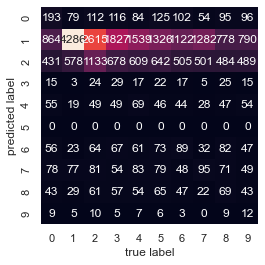

In [3]:

k_cluster = 100 #introducing k_clusters var - paper http://ufldl.stanford.edu/housenumbers/nips2011_housenumbers.pdf uses a special method of convolution K-means
# with 500 clusters.
# acc with 10 cluster = 19%
kmeans = KMeans(n_clusters=k_cluster, random_state=0).fit(X_flat)

clusters = kmeans.predict(X_test_flat)
labels = np.zeros_like(clusters)

for i in range(k_cluster):
    mask = (clusters == i)
    labels[mask] = mode(y_test[mask])[0]

print("acc = ", accuracy_score(y_test, labels))

mat = confusion_matrix(y_test, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');


In [4]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_flat, y)
print(lda.explained_variance_ratio_)

[0.1804435  0.14095242 0.13761753 0.1057773  0.0965962  0.09150843
 0.08572986 0.08263318 0.07874159]
